# Introduction to scikit-learn

We would like to introduce you to scikit-learn with the help of an instructional example about text classification. We will cover the most basic principles and ideas about scikit-learn in this notebook. This tutorial is inspired by the sklearn tutorial on http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html, but contains a few more explanations and is suited to introduce scikit-learn in class.

$Author$: Phillip Ströbel

## Data

Get the data from http://qwone.com/~jason/20Newsgroups/. We will work with the 20news-bydate.tar.gz data set. Unzip it to a suitable destination. Here, all the data lies in the data folder. To our convenience, it has already been split into a training and a test set, so we don't have to care about this. What we need to do though is get the data and put it into a dataframe (you could also only work with dictionaries or other data containers). We do this for both the training and the test set.

In [67]:
import os
import codecs
import pandas as pd

def create_df(path_to_data, categories=[], shuffle=True, random_state=42):
    """
    takes the path of a folder containing all the subfolders (which contain the acutal documents). builds a pandas datafram with document ids, the text and the label. shuffled is default.
    :param path_to_data: path to top folder as a string
    :param categories: categories which should be in the dataframe as list of strings, default is all categories
    :param shuffle: boolean, determines whether data should be shuffled or not
    :param random_state: integer, seed for shuffling
    :return: pandas dataframe with all th
    """
    
    doc_list = list()
    
    if categories == []:
        for category in os.listdir(path_to_data):
            for document in os.listdir(os.path.join(path_to_data, category)):
                doc = codecs.open(os.path.join(path_to_data, category, document), 'r', 'latin-1').read().replace('\n', ' ')
                doc_list.append([doc, category])
    else:
        for category in categories:
            for document in os.listdir(os.path.join(path_to_data, category)):
                doc = codecs.open(os.path.join(path_to_data, category, document), 'r', 'latin-1').read().replace('\n', ' ')
                doc_list.append([doc, category])
    
    df = pd.DataFrame(doc_list, columns=['text', 'label'])

    return df.sample(frac=1, random_state=random_state)
            

In [68]:
train = create_df('data/20news-bydate/20news-bydate-train')
test = create_df('data/20news-bydate/20news-bydate-test')

In [69]:
print('training size: ', train.shape)
print('test size: ', test.shape)

training size:  (11314, 2)
test size:  (7532, 2)


In [70]:
train.describe()

,text,label
count,11314,11314
unique,11314,20
top,From: mad9a@fermi.clas.Virginia.EDU (Michael A...,rec.sport.hockey
freq,1,600


In [71]:
train.groupby('label').size()

label
alt.atheism                 480
comp.graphics               584
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
comp.sys.mac.hardware       578
comp.windows.x              593
misc.forsale                585
rec.autos                   594
rec.motorcycles             598
rec.sport.baseball          597
rec.sport.hockey            600
sci.crypt                   595
sci.electronics             591
sci.med                     594
sci.space                   593
soc.religion.christian      599
talk.politics.guns          546
talk.politics.mideast       564
talk.politics.misc          465
talk.religion.misc          377
dtype: int64

As usual, we split the labels from the training and the test set.

In [72]:
X_train = train.text
y_train = train.label
X_test = test.text
y_test = test.label

Let's see if we got this right.

In [73]:
print('Training set shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test set shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training set shape:  (11314,)
Training labels shape:  (11314,)
Test set shape:  (7532,)
Test labels shape:  (7532,)


In [74]:
X_train.head

<bound method NDFrame.head of 7492     From: d88-jwa@hemul.nada.kth.se (Jon Wätte) Su...
3546     From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...
5582     From: rolfe@junior.dsu.edu (Tim Rolfe) Subject...
4793     From: GMILLS@CHEMICAL.watstar.uwaterloo.ca (Ph...
3813     From: km@cs.pitt.edu (Ken Mitchum) Subject: Re...
4219     From: PA146008@utkvm1.utk.edu (David Veal) Sub...
5211     From: belville@athena.mit.edu (Sharon Belville...
1608     From: robert@cpuserver.acsc.com (Robert Grant)...
8001     Subject: Re: PHILS, NL EAST NOT SO WEAK From: ...
11128    From: brain@cbnewsj.cb.att.com (harish.s.mangr...
3886     Subject: STARGARDTS DISEASE From: kmcvay@oneb....
9658     From: hilmi-er@dsv.su.se (Hilmi Eren) Subject:...
3400     From: bhjelle@carina.unm.edu () Subject: Re: M...
2576     From: bskendig@netcom.com (Brian Kendig) Subje...
4899     From: skucera@prstorm.bison.mb.ca (stan kucera...
7434     From: bauer@informatik.uni-ulm.de (Christian B...
2820     From: hesh@cup.hp

## Preprocessing
So far, so good! But we know that machine learning algorithms cannot work with text data directly. So we need to vectorise the data somehow. also, we might do some preprocessing. Let's see how we can tackle these problems.
### Vectorise the data 
Luckily, sklearn offers some nice classes which help us. We should tokenise the data and then vectorise it. Conveniently, sklearns `CountVectoriser()` does exactly that. Let's see how it works.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

Basically, the three central methods in sklearn are `transform`, `fit`, `fit_transform`, and `predict`. We will see how each of these work and when to use them. We have alredy made use of `fit_transform`. Instead of using this method, we could have called the method `fit` on the training set first and the use `transform` to vectorise the data (to 'transform' it). With the fitted `CountVectorizer` we can now transform other data, like for example the test set.

In [10]:
X_test_counts = count_vect.transform(X_test)

We will return to this later. First let us see what `CountVectorizer` produces.

In [75]:
X_train_counts

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

The vectorised form contains 11314 rows, which is the number of our documents, while the number of columns tells us something about the vocabulary size of the whole corpus. But what's a sparse matrix? Note that saving the complete, sparse document-vocabulary matrix would need to hold 1,472,030,598 values, most of which would be zero? Why? Instead, we only save 1,787,565 values in a compressed sparse row format. An example:

In [12]:
import numpy as np
from scipy import sparse

row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sparse.csr_matrix((data, (row, col)), shape=(3, 3))
mtx      

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [13]:
mtx.todense()

matrix([[1, 0, 2],
        [0, 0, 3],
        [4, 5, 6]], dtype=int64)

In [76]:
X_train_counts.shape

(11314, 130107)

In [77]:
X_train_counts[0,:]

<1x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 127 stored elements in Compressed Sparse Row format>

We can which positions of the document vector are occupied. A `1` means the word occurs once in the document, while any other number gives the exact count.

In [78]:
print(X_train_counts[0,:])

  (0, 51052)	1
  (0, 100156)	1
  (0, 2337)	1
  (0, 95956)	1
  (0, 29573)	1
  (0, 114731)	1
  (0, 46170)	1
  (0, 61538)	1
  (0, 78586)	1
  (0, 116834)	1
  (0, 39203)	1
  (0, 123759)	1
  (0, 29620)	1
  (0, 76551)	1
  (0, 95064)	1
  (0, 106209)	1
  (0, 59666)	1
  (0, 104494)	1
  (0, 95130)	1
  (0, 93699)	1
  (0, 101005)	1
  (0, 41525)	1
  (0, 114806)	1
  (0, 83858)	1
  (0, 86864)	1
  :	:
  (0, 110775)	1
  (0, 113812)	1
  (0, 89362)	5
  (0, 67602)	1
  (0, 103113)	1
  (0, 90379)	1
  (0, 64095)	1
  (0, 95162)	1
  (0, 87620)	1
  (0, 37037)	1
  (0, 89860)	3
  (0, 32567)	1
  (0, 26048)	4
  (0, 67798)	1
  (0, 99721)	1
  (0, 111322)	1
  (0, 125627)	1
  (0, 70553)	2
  (0, 105620)	3
  (0, 73730)	3
  (0, 85921)	3
  (0, 62752)	2
  (0, 71165)	1
  (0, 44752)	1
  (0, 56979)	2


The number of words in a document is also trivial to get.

In [79]:
X_train_counts[0,:].sum()

169

In a similar fashion, we can count how many times a certain word occurs in the text.

In [80]:
X_train_counts[:,0].sum()

1534

We can also learn more about the vocabulary, e.g., how many times a word occurs in the corpus. First, we need to find the index:

In [19]:
count_vect.vocabulary_.get(u'sin')

107529

Now we have the index, we can count how many times the word "sin" occurs in our corpus.

In [20]:
sin_index = count_vect.vocabulary_.get(u'sin')
X_train_counts[:,sin_index].sum()

284

So far, so good. `CountVectorizer` lets you also define if you want to count bigrams, or other n-grams. Moreover, you can not only count words, but als characters. We suggest you try these out for yourself. In the following, we will continue with unigrams.

Since we have numbers now instead of strings, we could start training models now. However, raw counts will not be very informative, since we also have to take the length of a dodument into account. Dividing each row by the total number of words will give us the term frequency for each document. That will be much better! Now we still might have higher values for words which occur often in many documents. typically, these words are less informative, so we need to downscale those weights. This will modify or counts so that we are left with what is called the "term frequency-inverse document frequency" measure, or tf-idf. The tf-idf measure is given by
\begin{equation}
f_{t,d}\cdot log \frac{N}{n_t}
\end{equation}
In sklearn, there is the `TfidfTransformer` which does exactly that for us :-).

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_tranformer = TfidfTransformer(smooth_idf=True).fit(X_train_counts)
X_train_tfidf = tfidf_tranformer.transform(X_train_counts)

In [22]:
X_train_tfidf.shape

(11314, 130107)

In [23]:
X_train_tfidf[0,:]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 127 stored elements in Compressed Sparse Row format>

In [24]:
print(X_train_tfidf[0,:])

  (0, 56979)	0.02565304152132985
  (0, 44752)	0.09478087712757985
  (0, 71165)	0.09478087712757985
  (0, 62752)	0.19562584539401784
  (0, 85921)	0.2753532341667019
  (0, 73730)	0.269421583481477
  (0, 105620)	0.18822150321045295
  (0, 70553)	0.12854417363144774
  (0, 125627)	0.10758852789712267
  (0, 111322)	0.012826520760664924
  (0, 99721)	0.017602991837857778
  (0, 67798)	0.054830315362812916
  (0, 26048)	0.3693212126672368
  (0, 32567)	0.08024716614572393
  (0, 89860)	0.0574060439262081
  (0, 37037)	0.08731684834379078
  (0, 87620)	0.023884357046512178
  (0, 95162)	0.023080567513977284
  (0, 64095)	0.023716339089827933
  (0, 90379)	0.013343514042299711
  (0, 103113)	0.07900491984199746
  (0, 67602)	0.050097559090540596
  (0, 89362)	0.0727716664155614
  (0, 113812)	0.04756705206656423
  (0, 110775)	0.08186707523553768
  :	:
  (0, 86864)	0.033785596330043605
  (0, 83858)	0.0700159651439916
  (0, 114806)	0.04450906812477559
  (0, 41525)	0.08162275316729287
  (0, 101005)	0.067291624806

Again we apply the transformation to the test set:

In [25]:
X_test_tfidf = tfidf_tranformer.transform(X_test_counts)

This should suffice as features to train a classifer (for the moment).

### Vectorise labels
Next, we deal with the labels. Every document has exactly one label attached. We have 20 labels in total. This means we can basically assign a number to each label.

In [81]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [82]:
y_train[0]

4

In [83]:
y_train.shape

(11314,)

In [84]:
y_test.shape

(7532,)

In [85]:
label_encoder.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

## Finally, let's train models
Now it's time to train models. Let's stich to the Multinomial Naive Bayes classifier for the moment.

In [86]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Let's see how well we do on the test set:

In [87]:
nb_clf.predict(X_test_tfidf)

array([ 3,  3, 17, ...,  9,  1,  3])

In [88]:
y_test

array([ 3,  2, 17, ...,  9,  1,  6])

Computing the accuracy is simple:

In [89]:
correct = 0

for index, prediction in enumerate(nb_clf.predict(X_test_tfidf)):
    if prediction == y_test[index]:
        correct +=1

print('Accuracy: ', correct/y_test.shape[0])

Accuracy:  0.7738980350504514


Almost 80 percent, that is not too bad. What about a Support Vector Classifier?

In [35]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [36]:
correct = 0

for index, prediction in enumerate(svc.predict(X_test_tfidf)):
    if prediction == y_test[index]:
        correct +=1

print('Accuracy: ', correct/y_test.shape[0])

Accuracy:  0.8531598513011153


An increase of 8%, that's good!

However, in order to determine the performance of our models we need cross validation.

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb_clf, X_train_tfidf, y_train, scoring='accuracy', cv=10)

In [91]:
scores

array([0.85526316, 0.8427065 , 0.85413005, 0.84859155, 0.8524735 ,
       0.83613818, 0.84663121, 0.84280639, 0.86032028, 0.85752449])

In [39]:
scores = cross_val_score(svc, X_train_tfidf, y_train, scoring='accuracy', cv=10)

In [40]:
scores

array([0.94473684, 0.92003515, 0.93936731, 0.92869718, 0.92579505,
       0.93356953, 0.92287234, 0.92007105, 0.92882562, 0.92430988])

We can also calculate precision, recall, and f1 relatively easily:

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=50)
sgd_clf.fit(X_train_tfidf, y_train)

y_train_predictions = cross_val_predict(sgd_clf, X_train_tfidf, y_train, cv=3)

In [46]:
print(precision_score(y_train, y_train_predictions, average='micro'))
print(recall_score(y_train, y_train_predictions, average='micro'))
print(f1_score(y_train, y_train_predictions, average='micro'))
conf_mx = confusion_matrix(y_train, y_train_predictions)
conf_mx

0.9170054799363621
0.9170054799363621
0.9170054799363621


array([[440,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,
          2,   2,  13,   1,   2,   1,  17],
       [  0, 502,  13,  20,   6,  19,   7,   1,   1,   1,   1,   0,   5,
          3,   2,   1,   2,   0,   0,   0],
       [  0,  15, 528,  18,   5,  15,   3,   1,   0,   1,   0,   0,   2,
          0,   1,   1,   0,   0,   1,   0],
       [  0,  15,  32, 467,  18,   8,  17,   2,   0,   1,   3,   0,  21,
          1,   1,   1,   1,   0,   1,   1],
       [  1,   7,   5,  26, 508,   4,   9,   1,   3,   3,   1,   1,   6,
          1,   1,   0,   0,   0,   1,   0],
       [  0,  20,  13,   9,   1, 530,   6,   3,   2,   1,   1,   2,   3,
          1,   1,   0,   0,   0,   0,   0],
       [  1,   3,   2,  14,   6,   1, 516,  12,   4,   0,   6,   0,  15,
          0,   2,   1,   0,   1,   1,   0],
       [  0,   3,   4,   3,   1,   3,  10, 536,  12,   4,   1,   0,   9,
          0,   3,   0,   4,   1,   0,   0],
       [  1,   1,   0,   0,   2,   1,   8,   5, 578,   0,   0,  

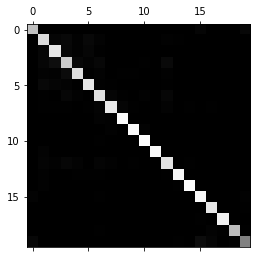

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

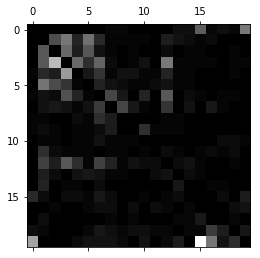

In [49]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [50]:
label_encoder.classes_

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

## Shortcuts in sklearn - pipelines
Sklearn allows us to build convenient `Pipelines`, which facilitate the management of our data and the training of our models enourmously. Consider for ex

In [55]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nb_clf', MultinomialNB())
])

We could even replace the two first lines of the pipeline by using `TfidfVectorizer`, which first fits and transforms the input the same way as the `CountVectorizer`.

In [56]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ar_tf=False, use_idf=True)), ('nb_clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [57]:
scores = cross_val_score(text_clf, X_train, y_train, scoring='accuracy', cv=10)

In [58]:
scores

array([0.85614035, 0.84446397, 0.85588752, 0.85123239, 0.85424028,
       0.83879539, 0.84840426, 0.84547069, 0.86120996, 0.85841496])

## Model selection - find your best model
For every model you would like to train, there is a plethora of parameters you could set. How to find the best model? Again, sklearn has a solution: `GridSearchCV`. With grid search cross validation, you can set your hyperparameter space and train different models with all the parameter combinations. Keep in mind that depending on how many folds you train, the whole training procedure takes significantly longer. But let's set up grid search cross validation. We set up a new pipeline for a SVC

In [59]:
from sklearn.model_selection import GridSearchCV

text_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC())
])

param_grid = {'vect__ngram_range': [(1, 1), (1, 2)],
             'svc__loss': ['hinge', 'squared_hinge'],
             'svc__multi_class': ['ovr', 'crammer_singer']}

gs_svc = GridSearchCV(text_svc, param_grid, cv=5, n_jobs=4, verbose=1)
gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 49.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)], 'svc__loss': ['hinge', 'squared_hinge'], 'svc__multi_class': ['ovr', 'crammer_singer']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

from sklearn.model_selection import GridSearchCV

text_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC())
])

param_grid = {'vect__ngram_range': [(1, 1), (1, 2)],
             'svc__loss': ['hinge', 'squared_hinge'],
             'svc__multi_class': ['ovr', 'crammer_singer']}

gs_svc = GridSearchCV(text_svc, param_grid, cv=10, n_jobs=3, verbose=1, return_train_score=True)
gs_svc.fit(X_train, y_train)

In [60]:
svc_df = pd.DataFrame.from_dict(gs_svc.cv_results_)
svc_df.sort_values(by=["rank_test_score"])

/home/phillip/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/phillip/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/phillip/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/phillip/anaconda3/lib/py

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_svc__loss,param_svc__multi_class,param_vect__ngram_range,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,686.134789,3.743508,0.930705,0.999403,hinge,crammer_singer,"(1, 2)","{'svc__loss': 'hinge', 'svc__multi_class': 'cr...",1,0.937417,...,0.924912,0.999558,0.926991,0.999116,0.934368,0.999669,286.866087,0.126190,0.004619,0.000193
7,662.552173,2.885766,0.930705,0.999359,squared_hinge,crammer_singer,"(1, 2)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",1,0.937417,...,0.924912,0.999448,0.926991,0.999006,0.934368,0.999669,208.876589,0.894399,0.004619,0.000214
5,57.669994,3.633046,0.930263,0.999669,squared_hinge,ovr,"(1, 2)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",3,0.936536,...,0.924028,0.999669,0.923451,0.999558,0.932151,0.999890,1.424082,0.317880,0.005513,0.000121
1,339.978553,3.932459,0.928938,0.998387,hinge,ovr,"(1, 2)","{'svc__loss': 'hinge', 'svc__multi_class': 'ov...",4,0.934332,...,0.926237,0.998232,0.921239,0.998012,0.930377,0.999007,47.562352,0.643115,0.004697,0.000332
4,12.755919,1.589989,0.924607,0.999138,squared_hinge,ovr,"(1, 1)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",5,0.929925,...,0.924912,0.999227,0.915044,0.999006,0.925055,0.999448,0.882834,0.366745,0.005138,0.000190
0,55.151473,1.638614,0.924342,0.995139,hinge,ovr,"(1, 1)","{'svc__loss': 'hinge', 'svc__multi_class': 'ov...",6,0.930366,...,0.924028,0.995359,0.913717,0.994478,0.927273,0.995474,9.684970,0.225647,0.005686,0.000363
2,184.052793,1.491734,0.924076,0.998564,hinge,crammer_singer,"(1, 1)","{'svc__loss': 'hinge', 'svc__multi_class': 'cr...",7,0.929044,...,0.922261,0.998674,0.919469,0.998343,0.926829,0.999117,52.200238,0.116839,0.003420,0.000313
6,185.887219,1.562905,0.924076,0.998564,squared_hinge,crammer_singer,"(1, 1)","{'svc__loss': 'squared_hinge', 'svc__multi_cla...",7,0.929044,...,0.922261,0.998674,0.919469,0.998343,0.926829,0.999117,41.081316,0.157256,0.003420,0.000313


In [62]:
gs_svc.predict(X_test)

array([ 3,  2, 17, ...,  9,  1,  2])

In [63]:
y_test

array([ 3,  2, 17, ...,  9,  1,  6])

In [64]:
best_model = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('svc', LinearSVC(loss='hinge', multi_class='crammer_singer'))
])

best_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...0,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0))])

In [65]:
best_model.predict(X_test)

array([ 3,  2, 17, ...,  9,  1,  2])

In [66]:
correct = 0

for index, prediction in enumerate(best_model.predict(X_test)):
    if prediction == y_test[index]:
        correct +=1

print('Accuracy: ', correct/y_test.shape[0])

Accuracy:  0.8600637280934679
